In [15]:
import json
import numpy as np
import os
from tqdm.notebook import tqdm
import warnings
from audio2numpy import open_audio

import pandas as pd
from matplotlib import pyplot as plt

import pickle

warnings.filterwarnings("ignore")


In [7]:
import sys
sys.path.append(r'../../..')
import VAT

In [8]:
# Set dataset path
datasetPath = r".."
rawDataPath = os.path.join(datasetPath, "raw")
outPath = "raw"

In [9]:
#Read Dataset
with open(os.path.join(datasetPath, 'metadata.json')) as f:
  datalist = json.load(f)
  
data = {
    "filename": [],
    "signal": [],
    "sr": [],
    "label": []
}

#Feature extraction

for key in tqdm(datalist):
  if 'filename' not in key:
    continue
  filename = key['filename']
  try:
    filepath = os.path.join(rawDataPath, filename)
    signal, sr = open_audio(filepath)
  except:
    print(0)
    continue

  if 'covid19' in key and 'verified' in key and int(key['covid19']) == int(key['verified']):
    data["label"].append(int(key['covid19']))
    data["filename"].append(filename)
    data["sr"].append(sr)

    correct = None
    if len(signal.shape) == 1:
      correct = signal
    else:
      if np.sum(np.var(signal[:,1])) > np.sum(np.var(signal[:,0])):
        correct = signal[:,1]
      else:
        correct = signal[:,0]

    data["signal"].append(correct)


  0%|          | 0/1324 [00:00<?, ?it/s]

0
0


In [10]:
print("covid: 0, {}".format(np.sum(np.asarray(data["label"]) == 0)))
print("covid: 1, {}".format(np.sum(np.asarray(data["label"]) == 1)))

covid: 0, 438
covid: 1, 381


In [12]:
df = pd.DataFrame(data)

In [13]:
df.to_pickle("data.pkl")

sr
8000     381
48000    438
Name: filename, dtype: int64


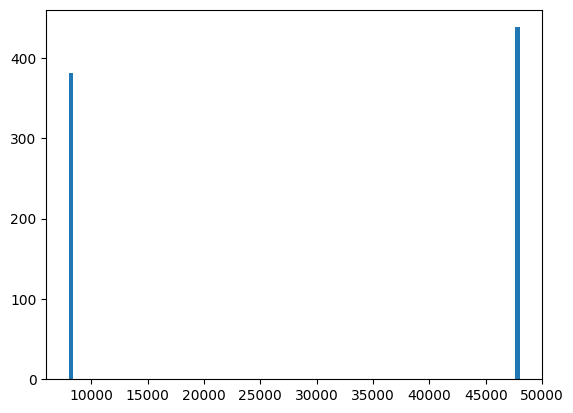

In [16]:
# Analyse the sample rates
print(df.groupby("sr")["filename"].count())
_, _, _ = plt.hist(data["sr"], 100)

(array([  4.,   3.,  13.,  21.,  35.,  57.,  91.,  96., 115., 384.]),
 array([0.01342773, 0.11208496, 0.21074219, 0.30939943, 0.40805665,
        0.50671387, 0.6053711 , 0.7040283 , 0.80268556, 0.90134275,
        1.        ], dtype=float32),
 <BarContainer object of 10 artists>)

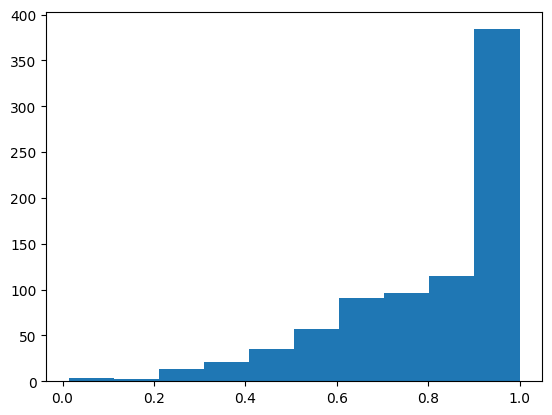

In [17]:
plt.hist([max(abs(signal)) for signal in data["signal"]])